# 主結構改自test_before_class.ipynb
# graph改自answer_cifar10_tensorflow.ipynb

## General writing flow
1. import required libraries
2. load data and do some data pre-processing
3. split your data into training and validation set
4. build the network
5. train the model and record/monitoring the performance

## 1. Import required libries and set some parameters 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import os

from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
'''設定參數'''
batch_size =32
epochs = 100
lr = 0.001
train_ratio= 0.9

'''或者你可以將以上參數換成下面的呈現方式'''
# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument('--batch_size', default = 32, type = int)
# parser.add_argument('--epochs', default = 100, type = int)
# parser.add_argument('--lr', default = 0.001, type = float)
# parser.add_argument('--train_ratio', default = 0.9, type = float)
# FLAGS = parser.parse_args([]) # if not jupyter notebook, remove []

'或者你可以將以上參數換成下面的呈現方式'

In [0]:
import pandas as pd
import numpy as np
import glob
import cv2
datadir='//data/examples/may_the_4_be_with_u/where_am_i/'

In [0]:
sz=10
conv_ksize = (3,3)
conv_strides = (1,1)
pool_ksize = (2,2)
pool_strides = (2,2)
n_filters_1 = 64
n_filters_2 = 128

In [0]:
labelmap=pd.read_csv(datadir+'mid_term_mapping.txt',names=['place','index'])

In [0]:
labelmap

,place,index
0,CALsuburb,9
1,PARoffice,7
2,bedroom,12
3,coast,10
4,forest,4
5,highway,14
6,industrial,2
7,insidecity,3
8,kitchen,0
9,livingroom,5


In [0]:
sortlabel=labelmap.sort('index')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [0]:
targetlist=sortlabel.place.as_matrix().tolist()

In [0]:
targetlist

['kitchen',
 'street',
 'industrial',
 'insidecity',
 'forest',
 'livingroom',
 'opencountry',
 'PARoffice',
 'mountain',
 'CALsuburb',
 'coast',
 'store',
 'bedroom',
 'tallbuilding',
 'highway']

In [0]:
x=[]
y=[]
for i,c in enumerate(targetlist):
    ff=glob.glob((datadir+'train/'+c+'/*jpg'))
    for f in ff:
        img=cv2.imread(f,0)
        img200=cv2.resize(img,(sz,sz))
        iii=(np.reshape(img200,(sz,sz,1))).astype(float)
        x.append(iii)
        nn=np.zeros(15,dtype=float)
        nn[i]=1
        y.append(nn)
xx=np.array(x)
yy=np.array(y)

In [0]:
# You should always set visible devices before importing tensorflow
#os.environ['CUDA_VISIBLE_DEVICES'] = str(FLAGS.gpu_id)
import tensorflow as tf

## 3. Split your data into training and validation sets

In [0]:
#----------------------------資料training set, testing set 分割---------------------------------------

x_train, x_valid, y_train, y_valid = train_test_split(xx, 
                                                      yy, 
                                                      test_size = 1.0 - train_ratio,
                                                      stratify = yy.argmax(axis = 1))
#------------------------------------檢查資料---------------------------------------------------------
print("training set data dimension")
print(x_train.shape)
print(y_train.shape)
print("-----------")
print("training set: %i" % len(x_train))
print("validation set: %i" % len(x_valid))


training set data dimension
(2686, 10, 10, 1)
(2686, 15)
-----------
training set: 2686
validation set: 299


## 4. build graph

In [0]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function

    conv_layer = tf.layers.conv2d(x_tensor, conv_num_outputs, kernel_size=conv_ksize, strides=conv_strides, activation=tf.nn.sigmoid)   
#     conv_layer = tf.layers.max_pooling2d(conv_layer, pool_size=pool_ksize, strides=pool_strides)

    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""


"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

In [0]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # HINT: tf.layers.flatten
    return tf.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""


"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

In [0]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # HINT: tf.layers.dense, remember to use non-linear activation function

    return tf.layers.dense(x_tensor, num_outputs, activation=tf.nn.sigmoid)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""


"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

In [0]:
# ------------------------------------graph-----------------------------------------
tf.reset_default_graph() # clean graph
# Declare the input node
with tf.name_scope('input'):
    x_input = tf.placeholder(shape = (None,sz, sz, 1), 
                             name = 'x_input',
                             dtype=tf.float32)
    y_out = tf.placeholder(shape = (None, y_train.shape[1]), 
                           name = 'y_label',
                           dtype=tf.float32)

with tf.variable_scope('con_layer'):
    conv_1 = conv2d_maxpool(x_input, n_filters_1, conv_ksize, conv_strides, pool_ksize, pool_strides)
   
with tf.variable_scope('flatten'):    
    fc = flatten(conv_1)
    
with tf.variable_scope('dense'):        
    fc1 = fully_conn(fc, 3)
#     fc2 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    # --------------------Declare the network structure----------------------------


with tf.variable_scope('output_layer'):
    output = tf.layers.dense(fc1, len(targetlist))
'''---------------------------------------------------------------------------'''
with tf.name_scope('predict_ans'):
    predict_ans=tf.argmax(tf.nn.softmax(output),1)
with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y_out))
    
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(output),1), tf.argmax(y_out,1))
    compute_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

## 5b. Train the model and collect the performance

In [0]:
train_loss_list, valid_loss_list = [], []
train_acc_list, valid_acc_list = [], []
#--------------------------------------sess--------------------------------------------
sess = tf.InteractiveSession()
# we have to initalize all variables (e.g. weights/biases) at the begin
sess.run([tf.global_variables_initializer()])

for i in tqdm(range(epochs)):
    # get batch 
    total_batch = int(np.floor(len(x_train) / batch_size)) # just drop out last few samples...

    train_loss_collector, train_acc_collector = [], []
    for j in np.arange(total_batch):
        batch_idx_start = j * batch_size
        batch_idx_stop = (j+1) * batch_size

        x_batch = x_train[batch_idx_start : batch_idx_stop]
        y_batch = y_train[batch_idx_start : batch_idx_stop]

        this_loss, this_acc, _ = sess.run([loss, compute_acc,train_step],
                                feed_dict = {x_input: x_batch,
                                             y_out: y_batch})
        train_loss_collector.append(this_loss)
        train_acc_collector.append(this_acc)

    # do validation at the end of each epoch
    valid_acc, valid_loss = sess.run([compute_acc, loss],
                                     feed_dict = {x_input: x_valid,
                                                  y_out : y_valid})
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    train_loss_list.append(np.mean(train_loss_collector))
    train_acc_list.append(np.mean(train_acc_collector))

    # at the end of each epoch, shuffle the data
    x_train, y_train = shuffle(x_train, y_train)
# At the end of the training, do testing set
print('--- training done ---')



100%|██████████| 100/100 [00:23<00:00,  4.31it/s]

--- training done ---


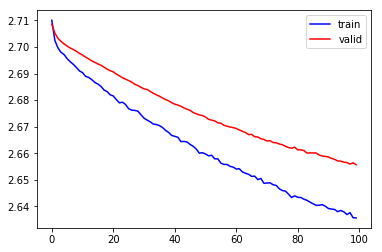

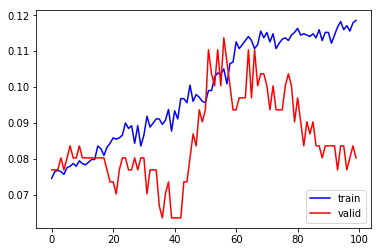

In [0]:
#--------------------------------------plot---------------------------------------------
plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b', label = 'train')
plt.plot(np.arange(len(valid_loss_list)), valid_loss_list, 'r', label = 'valid')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b', label = 'train')
plt.plot(np.arange(len(valid_acc_list)), valid_acc_list, 'r', label = 'valid')
plt.legend(loc = 4)
plt.show()

In [0]:
testdata=pd.read_csv(datadir+'img-submission.csv')

In [0]:
testdata

,id,class
0,c117693e1cf24a5232090d1548cb11d4e5ea0df65680c4...,1
1,96baacc2e97886a998807ce197574821a6dc83c227c746...,1
2,f9bd26db23eb9b544ca78be79b11b4d1259e802885861d...,1
3,b42bcd8e6645fcc2ac40ee44b7dc8d74a77081d0aea7a1...,1
4,5bc53cef9168882f0ff67a81b3e7269f62b7fd5343d06d...,1
5,f80823d6bff6c0beba6d55a3157d7a4fa2de4f966351e0...,1
6,3a12151639cf9f8e2af9ea36c2ce6bb15dd8730ea6dc90...,1
7,a5e0980425df5b98864a9580e081a7209e1b6810ed515a...,1
8,d4ea833073c4391387bebaef3c51c22861c1ff108cbb3c...,1
9,013c78d920be5390dbc66ca238ae3f49a2b0cf13e36013...,1


In [0]:
testdataindexlist=testdata.id.as_matrix().tolist()

In [0]:
x_t=[]



for f in testdataindexlist:
    img=cv2.imread(datadir+'testset/'+f+'.jpg',0)
    img200=cv2.resize(img,(sz,sz))
    iii=(np.reshape(img200,(sz,sz,1))).astype(float)
    x_t.append(iii)

        
x_test=np.array(x_t)


In [0]:
def predict(x):
    if np.ndim(x)==1:
        x=x.reshape([1,-1])
#     with tf.Session() as sess:
        # we have to initalize all variables (e.g. weights/biases) at the begin
#         sess.run([tf.global_variables_initializer()])
    
    
    return sess.run(predict_ans,feed_dict = {x_input:x})

In [0]:
testdata['class']=predict(x_test)

In [0]:
testdata

,id,class
0,c117693e1cf24a5232090d1548cb11d4e5ea0df65680c4...,6
1,96baacc2e97886a998807ce197574821a6dc83c227c746...,6
2,f9bd26db23eb9b544ca78be79b11b4d1259e802885861d...,6
3,b42bcd8e6645fcc2ac40ee44b7dc8d74a77081d0aea7a1...,6
4,5bc53cef9168882f0ff67a81b3e7269f62b7fd5343d06d...,8
5,f80823d6bff6c0beba6d55a3157d7a4fa2de4f966351e0...,13
6,3a12151639cf9f8e2af9ea36c2ce6bb15dd8730ea6dc90...,8
7,a5e0980425df5b98864a9580e081a7209e1b6810ed515a...,6
8,d4ea833073c4391387bebaef3c51c22861c1ff108cbb3c...,6
9,013c78d920be5390dbc66ca238ae3f49a2b0cf13e36013...,8


In [0]:
testdata.to_csv('ans.csv', index=False)